# Method defs BEGINNER

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos). Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'methoddef__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('methoddefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 10:32:02.675789 Data cache files found ...
2024-07-05 10:32:02.707377 Data cache files successfully loaded!!
The dataset contains 35666 (38.59%) instances for BEGINNER class and 56754 (61.41%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached', 'methoddef__expertise_level', 'functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (35666, 20)
As we can see the downloaded data contains a total of 35666 instances. For each instance we have 20 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35666 entries, 0 to 64039
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   methoddef__is_class_method               35666 non-null  bool   
 1   methoddef__is_static_method              35666 non-null  bool   
 2   methoddef__is_constructor_method         35666 non-null  bool   
 3   methoddef__is_abstract_method            35666 non-null  bool   
 4   methoddef__is_property                   35666 non-null  bool   
 5   methoddef__is_wrapper                    35666 non-null  bool   
 6   methoddef__is_cached                     35666 non-null  bool   
 7   methoddef__expertise_level               35666 non-null  object 
 8   functiondef__name_convention             35666 non-null  object 
 9   functiondef__number_of_characters        35666 non-null  int64  
 10  functiondef__is_magic                    35666 non-

Cómo podemos ver la tabla está compuesta por 12 variables boleanas, 6 numéricas y 2 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

methoddef__is_class_method                 0
methoddef__is_static_method                0
methoddef__is_constructor_method           0
methoddef__is_abstract_method              0
methoddef__is_property                     0
methoddef__is_wrapper                      0
methoddef__is_cached                       0
methoddef__expertise_level                 0
functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [5]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,35666,2,False,34761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,35666,2,False,34978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,35666,2,False,31569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,35666,2,False,35615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,35666,2,False,32814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,35666,1,False,35666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,35666,1,False,35666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__expertise_level,35666,1,BEGINNER,35666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__name_convention,35666,6,SnakeCase,23681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,35666.0,NaN,NaN,NaN,11.101245,5.606623,1.0,8.0,9.0,14.0,45.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 7
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 10), (10, 16), (16, inf)], # min: 1 ; max: 74
    "functiondef__body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(0.0, 2.0), (2.0, inf)], # min: 2 ; max: 7
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(full_table, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False  34761   97.462569
                       True    905    2.537431

 methoddef__is_static_method  count  percentage
                       False  34978   98.070992
                        True    688    1.929008

 methoddef__is_constructor_method  count  percentage
                            False  31569   88.512869
                             True   4097   11.487131

 methoddef__is_abstract_method  count  percentage
                         False  35615   99.857007
                          True     51    0.142993

 methoddef__is_property  count  percentage
                  False  32814   92.003589
                   True   2852    7.996411

 methoddef__is_wrapper  count  percentage
                 False  35666       100.0

 methoddef__is_cached  count  percentage
                False  35666       100.0

functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  185

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (35666, 25)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

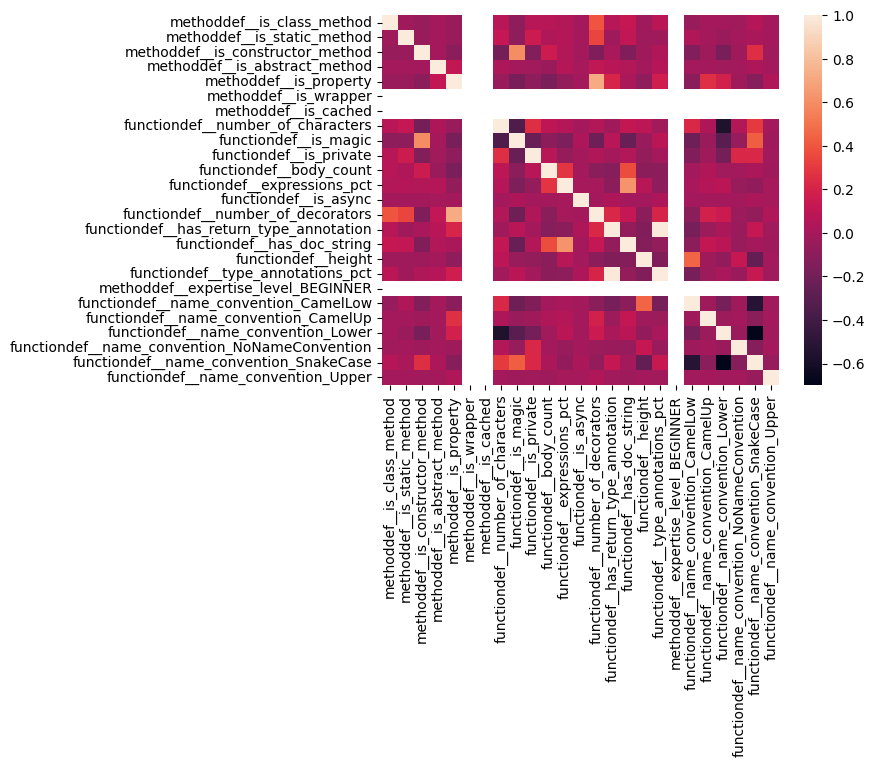

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 19 variable (12 booleanas, 4 numericas, 2 porcentuales y 1 categorica) se hara un analisis detallado

### Variable is_class_method (1/19)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

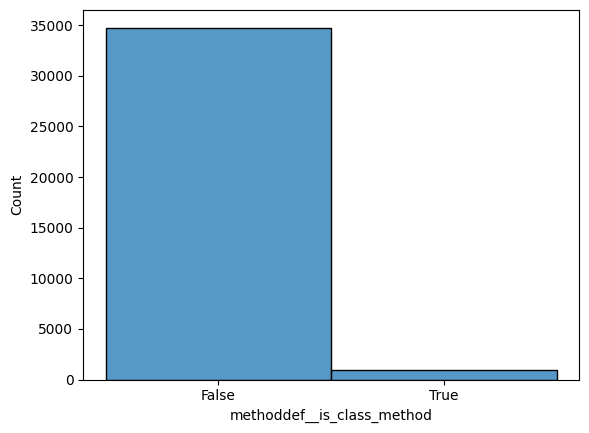

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [11]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 905 valores verdaderos y 34761 valores falsos. Y, la desviación típica es de 0.15726138651371002
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.025374306061795547.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9746256939382044.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 97.46% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 2.537% de los items.


In [13]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.000000,905.000000,905.000000,...,905.000000,905.000000,905.000000,905.0,905.0,905.0,905.000000,905.0,905.000000,905.0
mean,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.243093,0.013260,0.277348,...,0.676243,2.039779,0.263188,1.0,0.0,0.0,0.171271,0.0,0.828729,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.424514,0.114448,0.447937,...,0.468167,0.254534,0.342774,0.0,0.0,0.0,0.376954,0.0,0.376954,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0
50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0
75%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000000,0.000000,1.000000,...,1.000000,2.000000,0.666667,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0
max,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000,1.000000,1.000000,...,1.000000,4.000000,0.923077,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### Variable is_static_method (2/19)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='methoddef__is_static_method', ylabel='Count'>

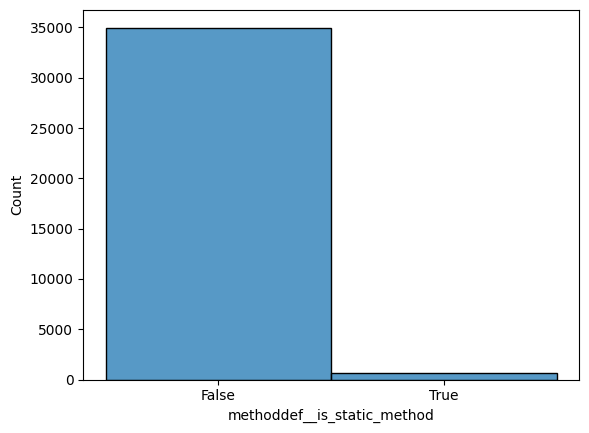

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 688 valores verdaderos y 34978 valores falsos. Y, la desviación típica es de 0.13754454255104065
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.019290080188414736.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.9807099198115853.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 98.07% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 1.929% de los items.


In [17]:
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,688.0,688.0,688.0,688.0,688.0,688.0,688.0,688.000000,688.0,688.000000,...,688.000000,688.000000,688.000000,688.0,688.000000,688.0,688.000000,688.0,688.000000,688.0
mean,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.300873,0.0,0.494186,...,0.667151,2.014535,0.110465,1.0,0.222384,0.0,0.062500,0.0,0.715116,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.906935,0.0,0.500330,...,0.471576,0.119768,0.313697,0.0,0.416150,0.0,0.242238,0.0,0.451687,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,0.0,0.000000,...,1.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.0,1.000000,...,1.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
max,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.000000,0.0,1.000000,...,1.000000,3.000000,1.000000,1.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Variable is_constructor_method (3/19)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='methoddef__is_constructor_method', ylabel='Count'>

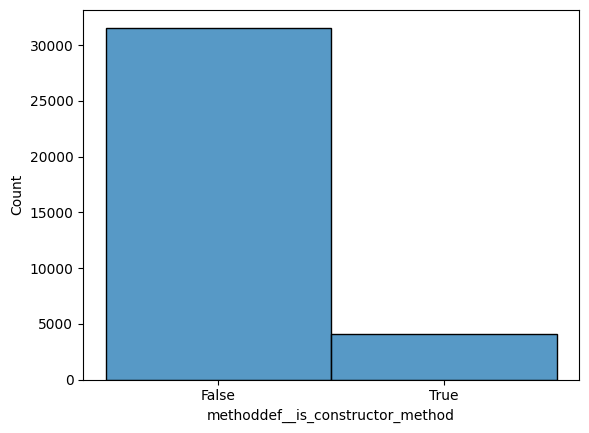

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_constructor_method contiene 4097 valores verdaderos y 31569 valores falsos. Y, la desviación típica es de 0.31887102127075195
La frecuencia con la que programa puede tener la variable is_constructor_method a True es 0.11487130600571974.
La frecuencia con la que programa puede tener la variable is_constructor_method a False es 0.8851286939942803.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 88.51% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 11.49% de los items.


In [21]:
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,...,4097.000000,4097.000000,4097.000000,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0,4097.0
mean,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.127166,2.085672,0.162914,1.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333200,0.353183,0.305360,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
max,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,1.000000,4.000000,0.937500,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_abstract_method (4/19)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

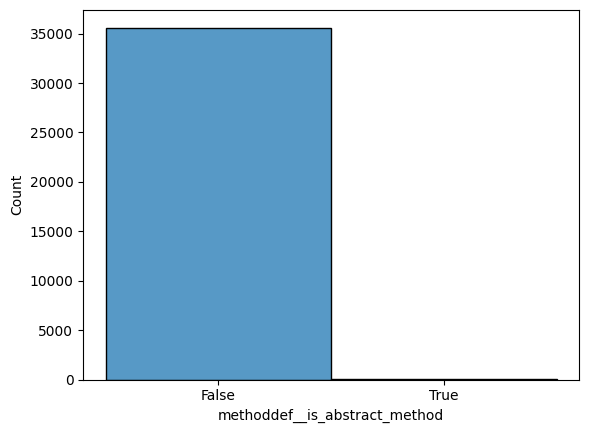

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [23]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 51 valores verdaderos y 35615 valores falsos. Y, la desviación típica es de 0.037787940353155136
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.0014299332697807435.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 0.9985700667302193.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 99.86% de los items.
La variable methoddef__is_abstract_method toma el valor de 1.0 en un 0.143% de los items.


In [25]:
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,51.0,51.0,51.0,51.0,51.000000,51.0,51.0,51.000000,51.000000,51.0,...,51.000000,51.0,51.000000,51.0,51.0,51.0,51.0,51.0,51.0,51.0
mean,0.0,0.0,0.0,1.0,0.882353,0.0,0.0,13.686275,0.117647,0.0,...,0.882353,2.0,0.519608,1.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0,0.325396,0.0,0.0,2.649454,0.325396,0.0,...,0.325396,0.0,0.116653,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,8.000000,0.000000,0.0,...,0.000000,2.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,13.000000,0.000000,0.0,...,1.000000,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,14.000000,0.000000,0.0,...,1.000000,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,15.000000,0.000000,0.0,...,1.000000,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
max,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,18.000000,1.000000,0.0,...,1.000000,2.0,0.800000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_property (5/19)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

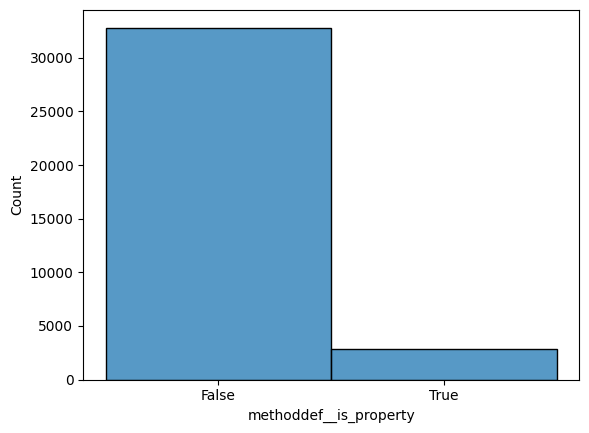

In [26]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [27]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 2852 valores verdaderos y 32814 valores falsos. Y, la desviación típica es de 0.2712414562702179
La frecuencia con la que programa puede tener la variable is_property a True es 0.07996411147871924.
La frecuencia con la que programa puede tener la variable is_property a False es 0.9200358885212808.


In [28]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 92.0% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 7.996% de los items.


In [29]:
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2852.0,2852.0,2852.0,2852.000000,2852.0,2852.0,2852.0,2852.000000,2852.0,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.0,2852.000000,2852.000000,2852.000000,2852.0,2852.000000,2852.000000
mean,0.0,0.0,0.0,0.015778,1.0,0.0,0.0,9.946003,0.0,0.027349,...,0.326788,2.004208,0.247195,1.0,0.002104,0.073633,0.448808,0.0,0.469144,0.006311
std,0.0,0.0,0.0,0.124639,0.0,0.0,0.0,4.705560,0.0,0.163127,...,0.469121,0.091654,0.250028,0.0,0.045827,0.261218,0.497460,0.0,0.499135,0.079207
min,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,6.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,10.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,13.000000,0.0,0.000000,...,1.000000,2.000000,0.500000,1.0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
max,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,34.000000,0.0,1.000000,...,1.000000,4.000000,0.500000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable is_wrapper (6/19)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

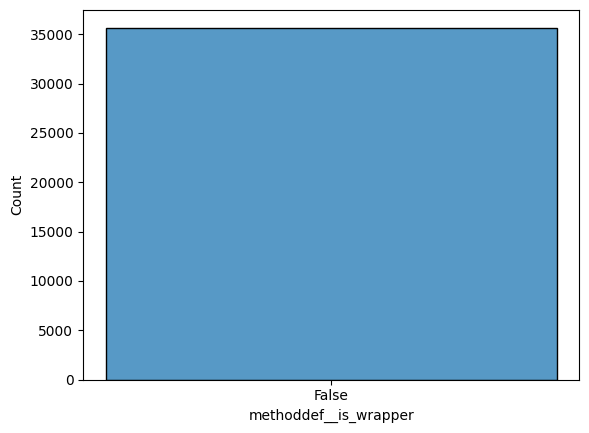

In [30]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [31]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 35666 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [32]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [33]:
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea wrapper.

### Variable is_cached (7/19)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

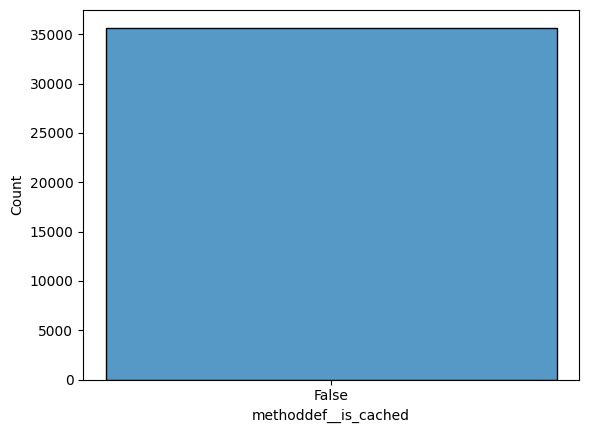

In [34]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [35]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 35666 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [36]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [37]:
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea cached.

### Variable is_private (8/19)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

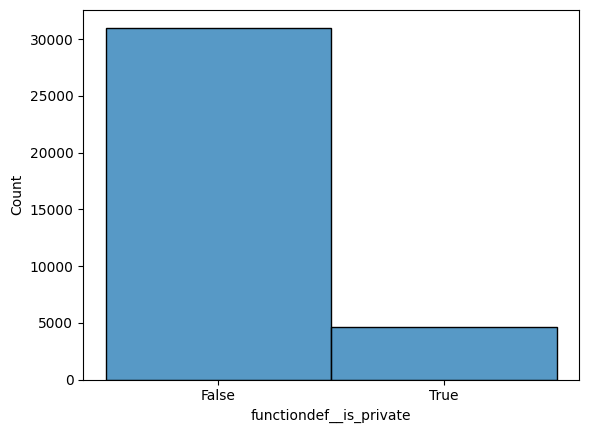

In [38]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [39]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 4647 valores verdaderos y 31019 valores falsos. Y, la desviación típica es de 0.33662930130958557
La frecuencia con la que programa puede tener la variable is_private a True es 0.1302921549935513.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8697078450064487.


In [40]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 86.97% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 13.03% de los items.


In [41]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,4647.000000,4647.000000,4647.0,4647.0,4647.000000,4647.0,4647.0,4647.000000,4647.0,4647.0,...,4647.000000,4647.000000,4647.000000,4647.0,4647.0,4647.0,4647.0,4647.000000,4647.000000,4647.0
mean,0.054013,0.073165,0.0,0.0,0.016785,0.0,0.0,14.784162,0.0,1.0,...,0.363245,2.038735,0.129272,1.0,0.0,0.0,0.0,0.060684,0.939316,0.0
std,0.226068,0.260436,0.0,0.0,0.128479,0.0,0.0,6.175447,0.0,0.0,...,0.480986,0.235207,0.272020,0.0,0.0,0.0,0.0,0.238776,0.238776,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,3.000000,0.0,1.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,11.000000,0.0,1.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,14.000000,0.0,1.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,18.500000,0.0,1.0,...,1.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0
max,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,36.000000,0.0,1.0,...,1.000000,4.000000,1.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,0.0


### Variable is_magic (9/19)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

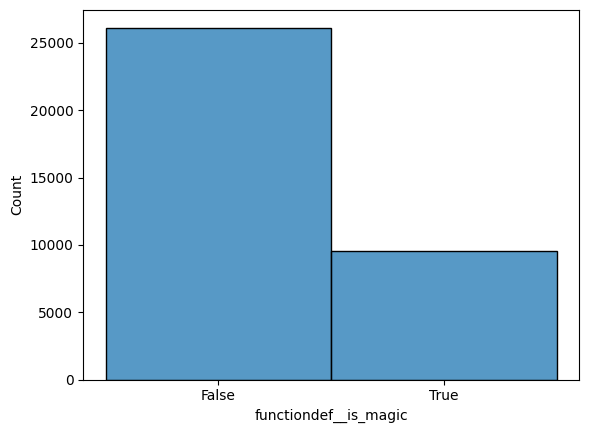

In [42]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [43]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 9531 valores verdaderos y 26135 valores falsos. Y, la desviación típica es de 0.4425192177295685
La frecuencia con la que programa puede tener la variable is_magic a True es 0.26722929400549544.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.7327707059945046.


In [44]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 73.28% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 26.72% de los items.


In [45]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,9531.000000,9531.0,9531.000000,9531.000000,9531.0,9531.0,9531.0,9531.000000,9531.0,9531.0,...,9531.000000,9531.000000,9531.000000,9531.0,9531.0,9531.0,9531.0,9531.0,9531.0,9531.0
mean,0.001259,0.0,0.429860,0.000630,0.0,0.0,0.0,8.010702,1.0,0.0,...,0.122547,2.085406,0.164651,1.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.035463,0.0,0.495082,0.025084,0.0,0.0,0.0,1.304802,0.0,0.0,...,0.327934,0.368269,0.287418,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,6.000000,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.000000,2.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.000000,2.000000,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
max,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,16.000000,1.0,0.0,...,1.000000,4.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (10/19)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

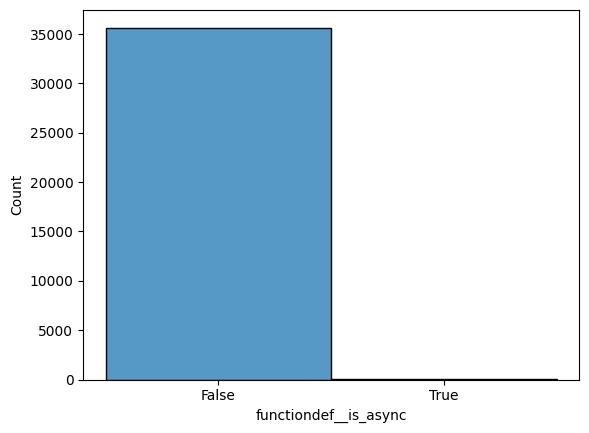

In [46]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [47]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 12 valores verdaderos y 35654 valores falsos. Y, la desviación típica es de 0.01833987794816494
La frecuencia con la que programa puede tener la variable is_async a True es 0.0003364548870072338.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9996635451129927.


In [48]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 99.97% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 0.03365% de los items. [OUTLIER]


In [49]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,...,12.0,12.0,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.500000,1.0,0.0,...,0.0,2.0,0.541667,1.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522233,0.0,0.0,...,0.0,0.0,0.290637,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,2.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.500000,1.0,0.0,...,0.0,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,1.0,0.0,...,0.0,2.0,0.800000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,1.0,0.0,...,0.0,2.0,0.800000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable has_return_type_annotation (11/19)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

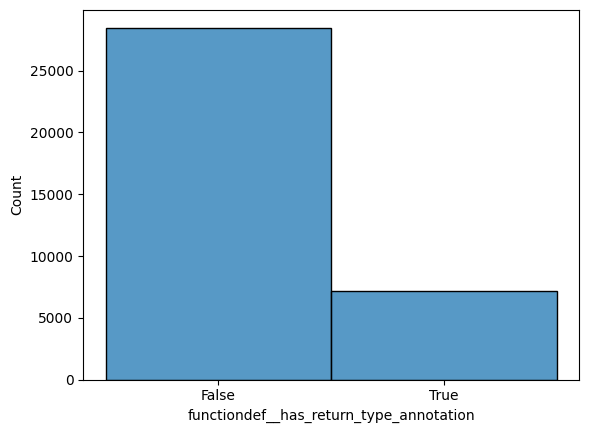

In [50]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [51]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 7178 valores verdaderos y 28488 valores falsos. Y, la desviación típica es de 0.40094462037086487
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.20125609824482701.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.798743901755173.


In [52]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 79.87% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 20.13% de los items.


In [53]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.0,7178.0,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.0,7178.000000,7178.0,7178.000000,7178.0,7178.000000,7178.0
mean,0.047367,0.010588,0.121761,0.006966,0.196434,0.0,0.0,11.186682,0.332823,0.121900,...,0.243243,2.000697,0.625773,1.0,0.000697,0.0,0.213151,0.0,0.786152,0.0
std,0.212437,0.102358,0.327032,0.083176,0.397328,0.0,0.0,6.089389,0.471256,0.327193,...,0.429071,0.026385,0.124551,0.0,0.026385,0.0,0.409562,0.0,0.410049,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.666667,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,1.000000,0.000000,...,0.000000,2.000000,0.750000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,35.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Variable has_doc_string (12/19)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

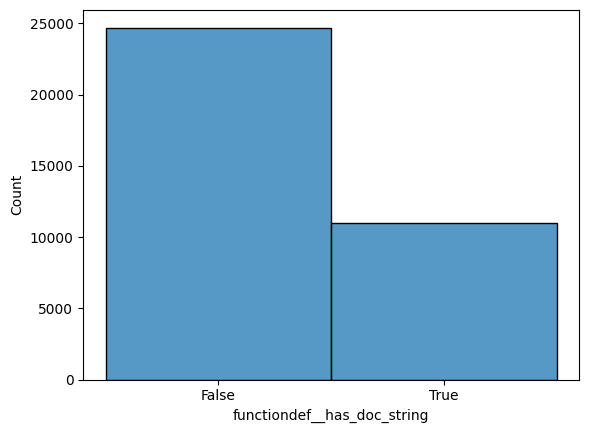

In [54]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [55]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 10960 valores verdaderos y 24706 valores falsos. Y, la desviación típica es de 0.46137937903404236
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.30729546346660686.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6927045365333931.


In [56]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 69.27% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 30.73% de los items.


In [57]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000,10960.0,10960.0,10960.000000,10960.000000,10960.000000,...,10960.0,10960.000000,10960.000000,10960.0,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000,10960.0
mean,0.055839,0.041880,0.047536,0.004106,0.085036,0.0,0.0,12.037500,0.106569,0.154015,...,1.0,2.047263,0.102281,1.0,0.073723,0.019434,0.244891,0.001369,0.660584,0.0
std,0.229622,0.200323,0.212793,0.063948,0.278949,0.0,0.0,5.955163,0.308579,0.360979,...,0.0,0.294661,0.240435,0.0,0.261331,0.138052,0.430042,0.036971,0.473533,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,1.0,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,1.0,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,1.0,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,0.000000,...,1.0,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,37.000000,1.000000,1.000000,...,1.0,4.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Variable number_of_characters (13/19)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 45. Con una media de 11.1.

<Axes: ylabel='functiondef__number_of_characters'>

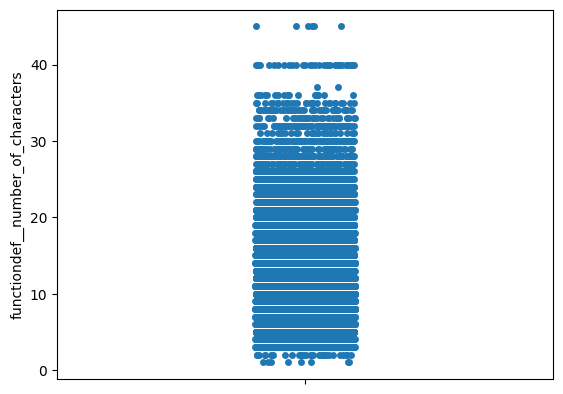

In [58]:
sns.stripplot(X['functiondef__number_of_characters'])

In [59]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5841795422814109
Rango valores atípicos extremos (Tukey): [-10.0,32.0]
Rango valores atípicos leves (Tukey): [-1.0,23.0]
Rango valores atípicos extremos (Fixed BoxPlot): [6.835145508343593,107.12500649659945]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -10.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -1.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 1264 instancias tienen un valor para functiondef__number_of_characters superior a 23.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.544% del total de instancias.
+3.0IQR: 177 instancias tienen un valor para functiondef__number_of_characters superior a 32.0 (Q3-3*IQR) para functiondef__number_of_characters. Re

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 32.0 (Con un MC de 58 usamos Tuckey Extremo)

In [60]:
X[X['functiondef__number_of_characters'] > 32].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,177.0,177.000000,177.0,177.0,177.000000,177.0,177.0,177.000000,177.0,177.000000,...,177.000000,177.000000,177.000000,177.0,177.000000,177.0,177.0,177.0,177.000000,177.000000
mean,0.0,0.033898,0.0,0.0,0.033898,0.0,0.0,35.593220,0.0,0.333333,...,0.322034,2.033898,0.117514,1.0,0.508475,0.0,0.0,0.0,0.423729,0.067797
std,0.0,0.181481,0.0,0.0,0.181481,0.0,0.0,2.933653,0.0,0.472742,...,0.468581,0.181481,0.272430,0.0,0.501346,0.0,0.0,0.0,0.495550,0.252110
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,33.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,34.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,34.000000,0.0,0.000000,...,0.000000,2.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,36.000000,0.0,1.000000,...,1.000000,2.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,0.000000
max,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,45.000000,0.0,1.000000,...,1.000000,3.000000,0.800000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Variable body_count (14/19)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 150. Con una media de 3,36.

<Axes: ylabel='functiondef__body_count'>

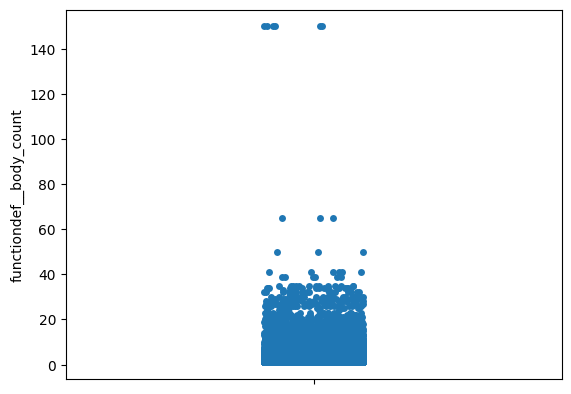

In [61]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [62]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4834727360345157
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.1714492422394711,35.12366122207282]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -8.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -3.5 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 2117 instancias tienen un valor para functiondef__body_count superior a 8.5 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.936% del total de instancias.
+3.0IQR: 658 instancias tienen un valor para functiondef__body_count superior a 13.0 (Q3-3*IQR) para functiondef__body_count. Representando un 1.845% del total de instancias.
L: 0 instancias tienen un valor para 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 35.1 (Con un MC de 0.48 usamos U)

In [63]:
X[X['functiondef__body_count'] > 35.1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.000000,24.0,24.0,...,24.000000,24.0,24.0,24.0,24.000000,24.0,24.000000,24.0,24.000000,24.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.875000,0.0,0.0,...,0.125000,2.0,0.0,1.0,0.125000,0.0,0.250000,0.0,0.625000,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.074269,0.0,0.0,...,0.337832,0.0,0.0,0.0,0.337832,0.0,0.442326,0.0,0.494535,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,...,0.000000,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.250000,0.0,0.0,...,0.000000,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,0.0,0.0,...,0.000000,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.750000,0.0,0.0,...,0.000000,2.0,0.0,1.0,0.000000,0.0,0.250000,0.0,1.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000,0.0,0.0,...,1.000000,2.0,0.0,1.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Variable number_of_decorators (15/19)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.14.

<Axes: ylabel='functiondef__number_of_decorators'>

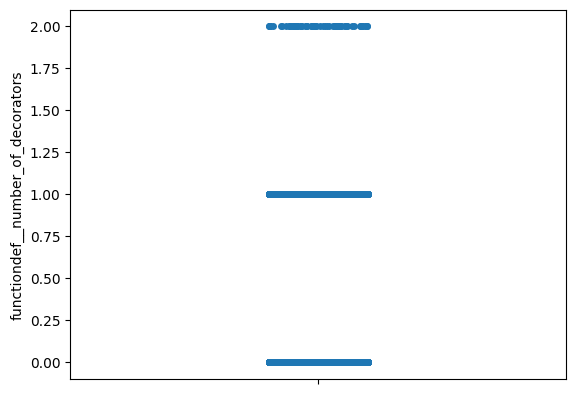

In [64]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [65]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7603099918389432
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 5122 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 14.36% del total de instancias.
+3.0IQR: 5122 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 14.36% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [66]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,5122.000000,5122.000000,5122.0,5122.000000,5122.000000,5122.0,5122.0,5122.000000,5122.000000,5122.000000,...,5122.000000,5122.000000,5122.000000,5122.0,5122.000000,5122.000000,5122.000000,5122.0,5122.000000,5122.000000
mean,0.176689,0.134323,0.0,0.009957,0.556814,0.0,0.0,11.694260,0.024600,0.166927,...,0.442601,2.014838,0.246473,1.0,0.032214,0.041000,0.338930,0.0,0.581999,0.005857
std,0.381442,0.341032,0.0,0.099297,0.496810,0.0,0.0,5.785146,0.154917,0.372947,...,0.496743,0.154899,0.297705,0.0,0.176585,0.198309,0.473392,0.0,0.493278,0.076315
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,7.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,11.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,15.000000,0.000000,0.000000,...,1.000000,2.000000,0.500000,1.0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,36.000000,1.000000,1.000000,...,1.000000,4.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable height (16/19)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 4. Con una media de 2.09.

<Axes: ylabel='functiondef__height'>

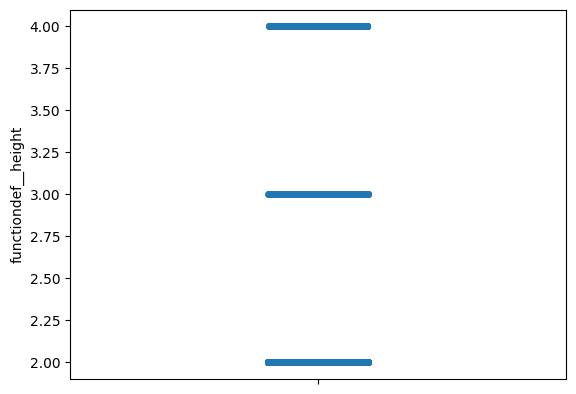

In [67]:
sns.stripplot(X['functiondef__height'])

In [68]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 2862 instancias tienen un valor para functiondef__height superior a 2.0 (Q3+1.5*IQR) para functiondef__height. Representando un 8.024% del total de instancias.
+3.0IQR: 2862 instancias tienen un valor para functiondef__height superior a 2.0 (Q3-3*IQR) para functiondef__height. Representando un 8.024% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 2.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Todos los umbrales son 2)

In [69]:
X[X['functiondef__height'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,2862.000000,2862.000000,2862.000000,2862.0,2862.000000,2862.0,2862.0,2862.000000,2862.000000,2862.000000,...,2862.000000,2862.000000,2862.000000,2862.0,2862.000000,2862.0,2862.000000,2862.000000,2862.000000,2862.0
mean,0.008386,0.003494,0.089448,0.0,0.002096,0.0,0.0,12.131726,0.188679,0.048218,...,0.100978,3.203005,0.000874,1.0,0.631027,0.0,0.088400,0.046122,0.234451,0.0
std,0.091205,0.059018,0.285439,0.0,0.045747,0.0,0.0,4.558729,0.391322,0.214264,...,0.301353,0.402306,0.020884,0.0,0.482611,0.0,0.283925,0.209785,0.423730,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,9.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,14.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,33.000000,1.000000,1.000000,...,1.000000,4.000000,0.500000,1.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable expressions_pct (17/19)
Esta variable representa la proporción de las sentencias en el root de la funcsion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.20.

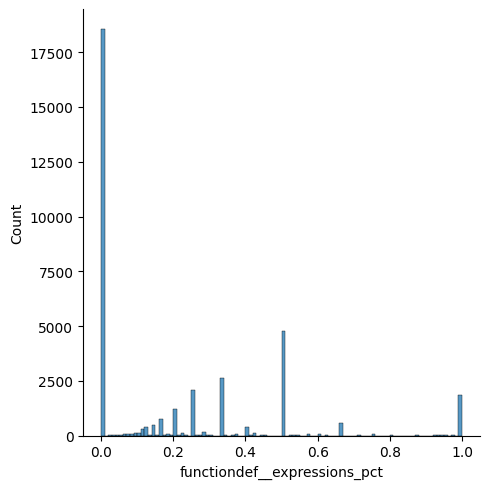

In [70]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [71]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4883232277342897
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09051149246024347,3.8592687341541847]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1916 instancias tienen un valor para functiondef__expressions_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 5.372% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct super

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 48 usamos Tuckey)

In [72]:
X[X['functiondef__expressions_pct'] > 0.83].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,1916.000000,1916.0,1916.000000,1916.000000,1916.000000,1916.0,1916.0,1916.000000,1916.000000,1916.000000,...,1916.000000,1916.000000,1916.000000,1916.0,1916.000000,1916.0,1916.000000,1916.000000,1916.000000,1916.0
mean,0.004175,0.0,0.109081,0.023486,0.029749,0.0,0.0,10.750522,0.184238,0.021921,...,0.386743,2.211900,0.129368,1.0,0.189979,0.0,0.287056,0.000522,0.522443,0.0
std,0.064499,0.0,0.311823,0.151482,0.169940,0.0,0.0,4.705907,0.387779,0.146463,...,0.487131,0.425044,0.253064,0.0,0.392387,0.0,0.452506,0.022846,0.499626,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,11.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,14.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0
max,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,28.000000,1.000000,1.000000,...,1.000000,4.000000,0.857143,1.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Importante
El 51% de los metodos no tienen expresiones.

### Variable type_annotations_pct (18/19)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.12.

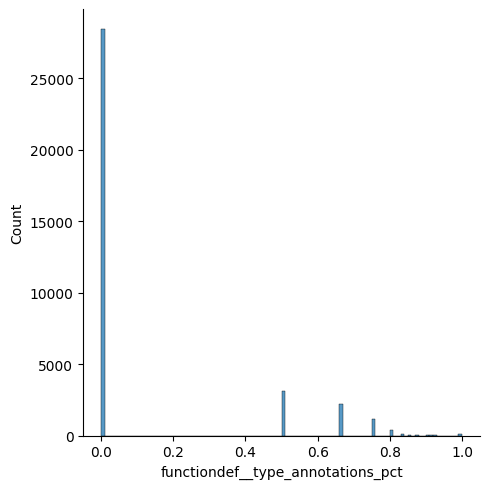

In [73]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [74]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6904737838194019
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 7229 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 20.27% del total de instancias.
+3.0IQR: 7229 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representando un 20.27% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Todos los umbrales son 0)

In [75]:
X[X['functiondef__type_annotations_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,7229.000000,7229.000000,7229.000000,7229.000000,7229.000000,7229.0,7229.0,7229.000000,7229.000000,7229.000000,...,7229.000000,7229.000000,7229.000000,7229.0,7229.000000,7229.0,7229.000000,7229.0,7229.000000,7229.0
mean,0.047033,0.010513,0.127957,0.006917,0.195048,0.0,0.0,11.164200,0.337529,0.121040,...,0.242219,2.000692,0.626690,1.0,0.000692,0.0,0.211648,0.0,0.787661,0.0
std,0.211724,0.102001,0.334065,0.082884,0.396265,0.0,0.0,6.073727,0.472900,0.326197,...,0.428456,0.026292,0.125160,0.0,0.026292,0.0,0.408505,0.0,0.408992,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.000000,0.000000,0.000000,...,0.000000,2.000000,0.500000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.000000,2.000000,0.666667,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,1.000000,0.000000,...,0.000000,2.000000,0.750000,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,35.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


### Importante
El 79% de los metodos no tienen anotaciones de tipo.

### Variable name_convention (19/19)
Esta variable es de tipo categórica y representa la name_convention del nombre del método.

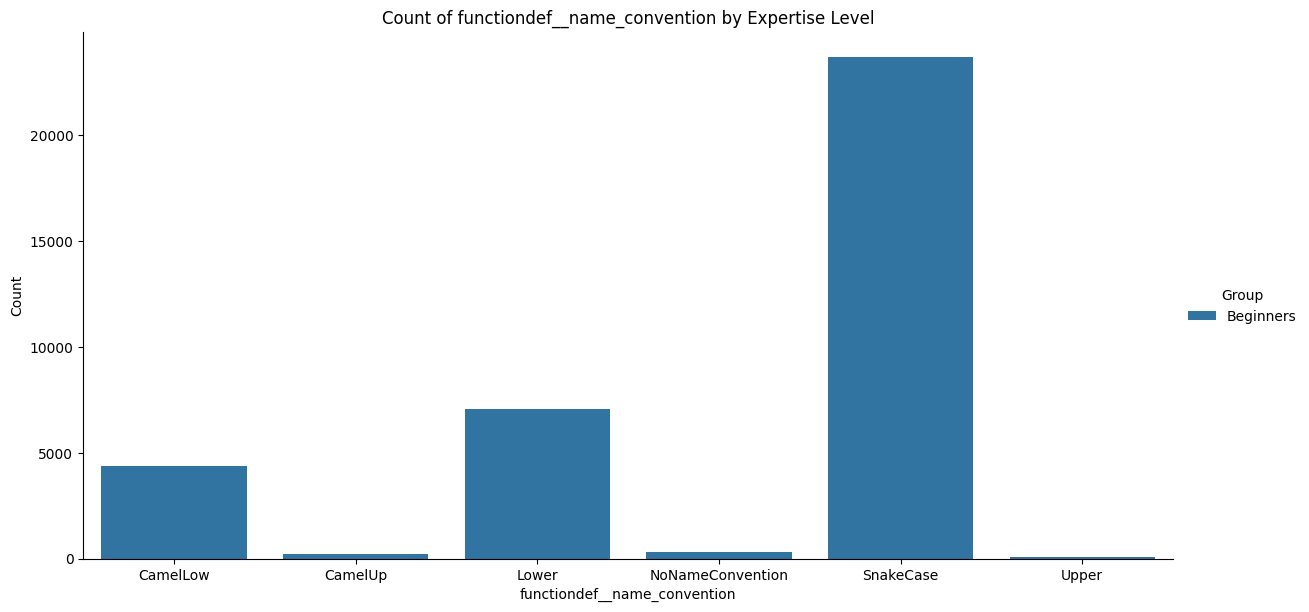

In [76]:
print_categorical_histogram(full_table, 'functiondef__name_convention',TARGET_FEATURE, include_all=False, include_experts=False)

In [77]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable functiondef__name_convention toma el valor de SnakeCase en un 66.4% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 19.75% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 12.27% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 0.8103% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.5972% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.1682% de los items.


In [78]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable functiondef__name_convention nunca toma valor Discard.


## Multivariate

Isolation forest algorithm

In [79]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct
393,False,True,False,False,False,False,False,BEGINNER,SnakeCase,21,True,False,13,0.153846,False,1,True,False,2,1.00
1233,True,False,False,False,False,False,False,BEGINNER,Lower,8,False,False,4,0.250000,False,1,False,True,4,0.00
1249,True,False,False,False,False,False,False,BEGINNER,Lower,8,False,False,2,0.500000,False,1,False,True,4,0.00
1405,False,False,False,False,False,False,False,BEGINNER,NoNameConvention,14,True,False,3,0.666667,False,0,False,False,4,0.00
3209,True,False,False,False,False,False,False,BEGINNER,Lower,6,False,False,7,0.142857,False,1,True,True,2,0.80
3477,False,False,False,False,False,False,False,BEGINNER,Lower,3,False,False,17,0.941176,False,0,True,False,2,0.75
3511,False,True,False,False,False,False,False,BEGINNER,SnakeCase,21,True,False,13,0.153846,False,1,True,False,2,1.00
4337,True,False,False,False,False,False,False,BEGINNER,Lower,8,False,False,4,0.250000,False,1,False,True,4,0.00
4521,False,False,False,False,False,False,False,BEGINNER,NoNameConvention,14,True,False,3,0.666667,False,0,False,False,4,0.00
6219,False,True,False,False,False,False,False,BEGINNER,SnakeCase,22,True,False,6,0.166667,False,1,True,True,2,1.00


### IMPORTANTE
Hay que analizar los 42 los outliers de la tabla.

In [80]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,39.0,0.435897,0.502356,0.000000,0.000000,0.00,1.000000,1.000000
methoddef__is_static_method,39.0,0.282051,0.455881,0.000000,0.000000,0.00,1.000000,1.000000
methoddef__is_constructor_method,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
methoddef__is_abstract_method,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
methoddef__is_property,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
methoddef__is_wrapper,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
methoddef__is_cached,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
functiondef__number_of_characters,39.0,11.820513,6.855163,3.000000,7.000000,8.00,21.000000,22.000000
functiondef__is_magic,39.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
functiondef__is_private,39.0,0.435897,0.502356,0.000000,0.000000,0.00,1.000000,1.000000


In [81]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,35627.0,0.024925,0.155899,0.0,0.0,0.0,0.000000,1.0
methoddef__is_static_method,35627.0,0.019002,0.136535,0.0,0.0,0.0,0.000000,1.0
methoddef__is_constructor_method,35627.0,0.114997,0.319023,0.0,0.0,0.0,0.000000,1.0
methoddef__is_abstract_method,35627.0,0.001431,0.037809,0.0,0.0,0.0,0.000000,1.0
methoddef__is_property,35627.0,0.080052,0.271377,0.0,0.0,0.0,0.000000,1.0
methoddef__is_wrapper,35627.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
methoddef__is_cached,35627.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
functiondef__number_of_characters,35627.0,11.100457,5.605171,1.0,8.0,9.0,14.000000,45.0
functiondef__is_magic,35627.0,0.267522,0.442673,0.0,0.0,0.0,1.000000,1.0
functiondef__is_private,35627.0,0.129958,0.336262,0.0,0.0,0.0,0.000000,1.0
